In [1]:
import pandas as pd
import json
import os

In [7]:
tracking = "../public/trackingData/"
dfs = []
for file_ in os.listdir(tracking):
    if '-' in file_:
        with open(tracking+file_, "r") as f:
            alog = json.load(f)
        dfs.append(pd.DataFrame(alog["trackingInfos"]))
allframe = pd.concat(dfs)

In [14]:
egoInfos = allframe[allframe["track_label_uuid"]=="ego"]
egoInfos

,track_label_uuid,timestamp,label_class,frame,Yaw,cityX,cityY,yawMod,length,width,height,bbox_city,speed,acceleration,currentLane,yawDiff,egoDist
0,ego,315968494019868000,VEHICLE,0,223.537150,2989.924219,1456.820606,0.000000,NaN,NaN,NaN,None,0.216876,2.922496,20001832,NaN,NaN
6,ego,315968494120065000,VEHICLE,1,223.537897,2989.929693,1456.823122,0.000747,NaN,NaN,NaN,None,0.509126,-2.859810,20001832,0.000747,NaN
16,ego,315968494220261000,VEHICLE,2,223.544122,2989.942258,1456.829612,0.006972,NaN,NaN,NaN,None,0.223145,0.969708,20001832,0.006225,NaN
17,ego,315968494320457000,VEHICLE,3,223.552280,2989.947313,1456.826025,0.015130,NaN,NaN,NaN,None,0.320116,-0.261957,20001832,0.008158,NaN
28,ego,315968494419990000,VEHICLE,4,223.552293,2989.956191,1456.826528,0.015143,NaN,NaN,NaN,None,0.293920,-0.052887,20001832,0.000013,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1879,ego,315972212119586000,VEHICLE,151,133.706857,2544.349546,1239.817862,-89.835764,NaN,NaN,NaN,None,22.163832,0.593335,20000001,0.054021,NaN
1902,ego,315972212219782000,VEHICLE,152,133.744187,2543.927648,1240.266239,-89.798434,NaN,NaN,NaN,None,22.223165,0.195206,20000001,0.037330,NaN
1914,ego,315972212319978000,VEHICLE,153,133.769368,2543.505934,1240.717049,-89.773253,NaN,NaN,NaN,None,22.242686,-1.184403,20000001,0.025181,NaN
1933,ego,315972212420175000,VEHICLE,154,133.776364,2543.082705,1241.167180,-89.766257,NaN,NaN,NaN,None,22.124246,NaN,20000001,0.006996,NaN


In [19]:
res = {}
for col in ["speed", "acceleration", "yawDiff"]:
    print(col,len(egoInfos.loc[~egoInfos[col].isna()][col].values.tolist()))
    res[col] = egoInfos.loc[~egoInfos[col].isna()][col].values.tolist()

speed 8125
acceleration 8078
yawDiff 8125


In [20]:
egoInfos.loc[egoInfos['acceleration'].isna()]

,track_label_uuid,timestamp,label_class,frame,Yaw,cityX,cityY,yawMod,length,width,height,bbox_city,speed,acceleration,currentLane,yawDiff,egoDist
1121,ego,315968509419876000,VEHICLE,154,189.045848,2968.873089,1439.178282,-34.491302,NaN,NaN,NaN,None,14.835114,NaN,20001111,-3.269060,NaN
1125,ego,315968509519408000,VEHICLE,155,185.881347,2968.464839,1439.122181,-37.655803,NaN,NaN,NaN,None,NaN,NaN,20001111,-3.164501,NaN
6767,ego,315967482519883000,VEHICLE,155,92.614784,-270.482538,2942.783272,0.288836,NaN,NaN,NaN,None,13.954001,NaN,10003011,0.010707,NaN
6802,ego,315967482620079000,VEHICLE,156,92.619394,-270.500335,2943.170474,0.293447,NaN,NaN,NaN,None,NaN,NaN,10003011,0.004611,NaN
2215,ego,315969054420476000,VEHICLE,154,218.665576,2592.521085,1202.539782,-4.864552,NaN,NaN,NaN,None,12.286390,NaN,20001138,-0.378528,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2943,ego,315967590519480000,VEHICLE,155,222.152880,2606.471352,1215.494948,-0.140471,NaN,NaN,NaN,None,NaN,NaN,20001138,0.046208,NaN
2270,ego,315968836419810000,VEHICLE,154,295.697527,3150.875674,1703.250882,72.160654,NaN,NaN,NaN,None,18.845348,NaN,20000619,2.495654,NaN
2275,ego,315968836520006000,VEHICLE,155,297.952594,3151.104503,1702.780063,74.415721,NaN,NaN,NaN,None,NaN,NaN,20000619,2.255067,NaN
1933,ego,315972212420175000,VEHICLE,154,133.776364,2543.082705,1241.167180,-89.766257,NaN,NaN,NaN,None,22.124246,NaN,20000001,0.006996,NaN


In [18]:
jsonWriter = open("../public/summary/speedAccYawDiff.json", 'w')
jsonWriter.write(json.dumps(res))
jsonWriter.close()

In [13]:
allframe.label_class.unique()

array(['VEHICLE', 'PEOPLE'], dtype=object)

In [12]:
alog.keys()

dict_keys(['trackingInfos', 'allLanes', 'mapCenter', 'mapRange', 'city', 'DISTVEH', 'DISTPEO', 'logId'])

In [1]:
import json
with open("../public/summary/speedAccYawDiff.json", 'r') as f:
    data = json.load(f)

In [3]:
# data["speed"].hist()

AttributeError: 'list' object has no attribute 'hist'

C:\Users\liuting\AppData\Local\Temp\ipykernel_26112\1691334688.py:2: UserWarning: 

Support for alternate kernels has been removed; using Gaussian kernel.
This will become an error in seaborn v0.13.0; please update your code.

  sns.kdeplot(data["speed"], kernel="epa")


<AxesSubplot: ylabel='Density'>

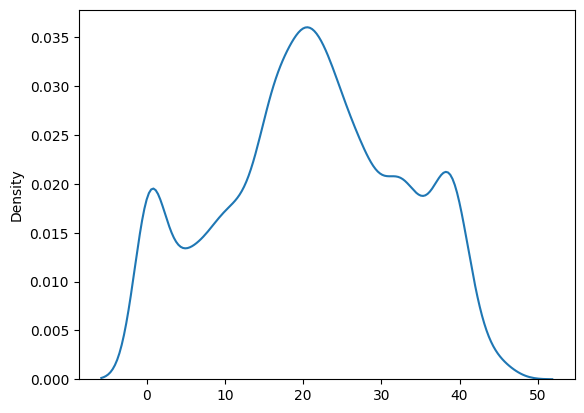

In [6]:
import seaborn as sns
sns.kdeplot(data["speed"], kernel="epa")

C:\Users\liuting\AppData\Local\Temp\ipykernel_26112\3469432964.py:1: UserWarning: 

Support for alternate kernels has been removed; using Gaussian kernel.
This will become an error in seaborn v0.13.0; please update your code.

  sns.kdeplot(data["yawDiff"], kernel="epa")


<AxesSubplot: ylabel='Density'>

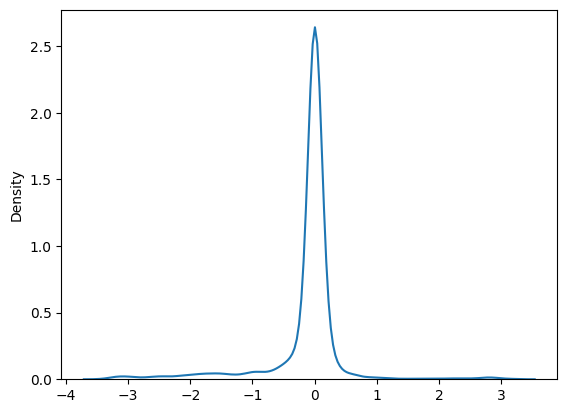

In [8]:
sns.kdeplot(data["yawDiff"], kernel="epa")